In [1]:
# Importando os pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Carregando o dataset
dados = pd.read_csv('dados/dataset.csv')

In [4]:
# Linhas x colunas
dados.shape

(500, 5)

In [5]:
# Infos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [6]:
# Amostra
dados.sample(10)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
162,3.292798,34.569381,12.854990,35.007482,576.311177
307,4.256983,33.902718,11.668867,37.341266,567.475011
172,3.905250,33.700400,11.924395,37.245032,552.940346
213,2.361087,31.864833,13.443406,36.878315,439.891280
445,2.910531,32.215527,12.216855,36.953960,438.417742
6,3.491093,31.874552,10.290351,36.929762,392.285244
105,3.414688,32.789773,11.670066,37.408748,483.159721
330,2.921350,32.312910,9.824402,35.742779,356.615568
125,1.914090,32.402371,10.875560,37.781143,338.319863
217,1.715777,33.308572,11.691686,37.480912,373.885724


#### Partindo para a análise exploratória dos dados:

In [7]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [8]:
# Correlação - tabela
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


<AxesSubplot:>

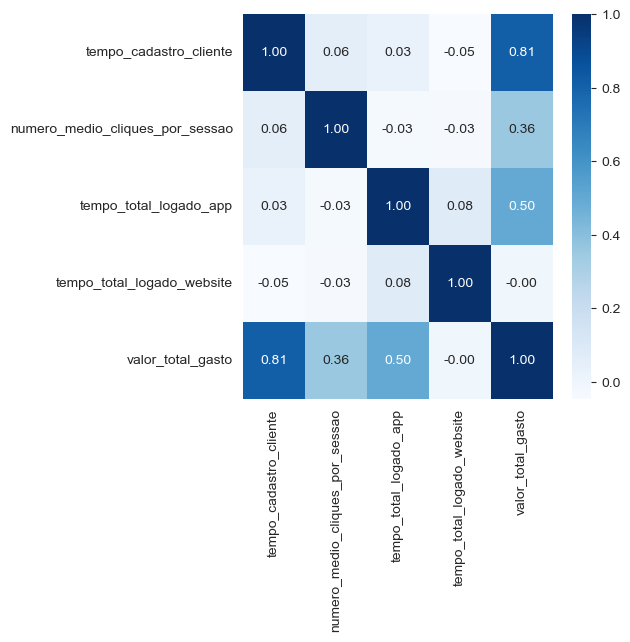

In [9]:
#Correlação - gráfico
plt.figure(figsize = (5, 5))
sns.heatmap(dados.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

A partir deste ponto, estaremos analisando a relação entre algumas variáveis preditoras e a variável alvo e também, a relação entre variáveis preditoras. 

### Análise 1 - Relação Entre Tempo no Web Site e Valor Gasto

<Figure size 1800x1200 with 0 Axes>

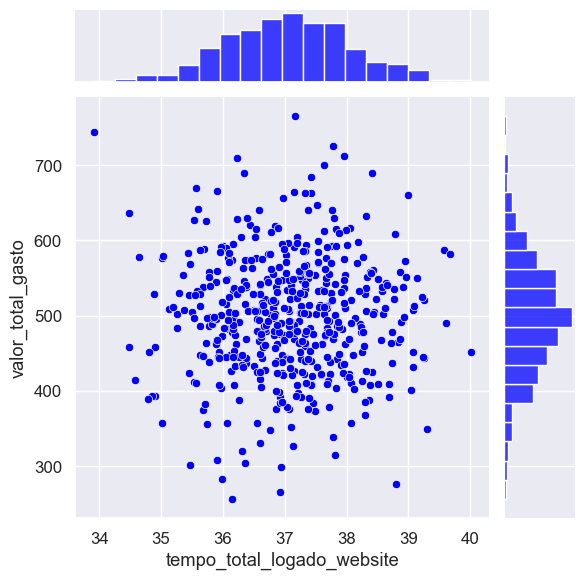

In [10]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_website', 
              y = 'valor_total_gasto',
              color = 'blue')

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos. 

Observando o gráfico de dispersão, não parece haver correlação entre as duas variáveis. Isso pode ser confirmado através da tabela de correlação, apresentada abaixo:

In [11]:
# Correlação
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


### Análise 2 - Relação Entre Tempo na App e Valor Gasto

<Figure size 1800x1200 with 0 Axes>

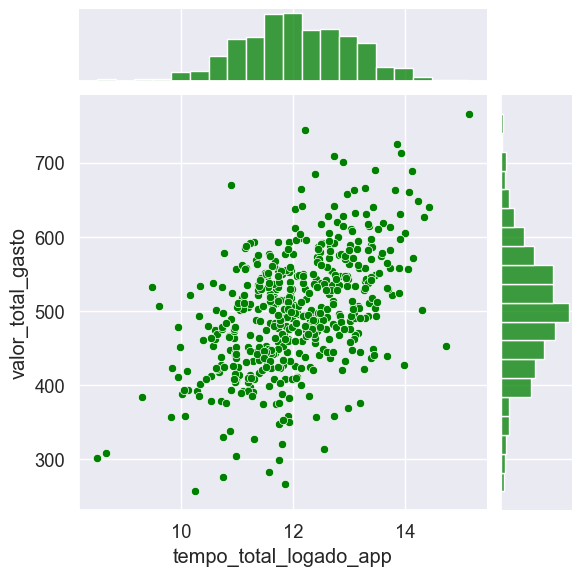

In [12]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_app', 
              y = 'valor_total_gasto', 
              color = 'green')

Aqui também temos dados apresentando uma distribuição normal.

Observando o gráfico de dispersão, parece haver uma leve correlação positiva entre as duas variáveis. Confirmado através da tabela apresentada abaixo:

In [13]:
# Correlação
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


Os dados têm uma correlação positiva moderada. Podemos deduzir que o valor total gasto mensalmente tende a aumentar se o cliente passar mais tempo logado no app.

### Análise 3 - Relação Entre Tempo na App e Tempo de Cadastro

<Figure size 1800x1200 with 0 Axes>

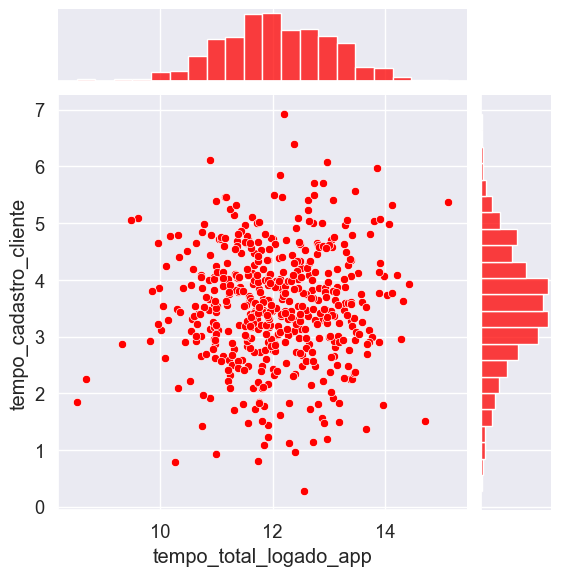

In [14]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, 
              x = 'tempo_total_logado_app', 
              y = 'tempo_cadastro_cliente', 
              color = 'red')

Novamente temos dados normalmente distribuídos.

A partir do gráfico de dispersão podemos ver que os dados são muito densos no meio do gráfico, não havendo uma correlação definida. Podemos deduzir que existem muitos clientes que são membros há 3-4 anos e gastam aproximadamente 11,5 a 12,5 minutos no app.

### Análise 4 - Relação Entre Tempo de Cadastro e Valor Gasto

<Figure size 1800x1200 with 0 Axes>

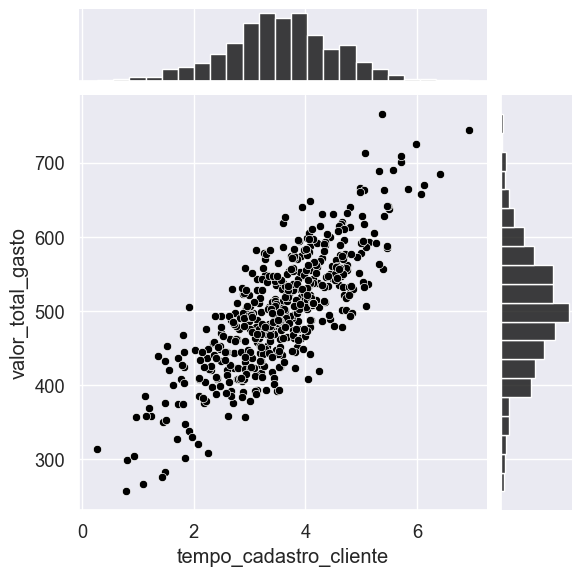

In [15]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, 
              x = 'tempo_cadastro_cliente', 
              y = 'valor_total_gasto', 
              color = 'black')

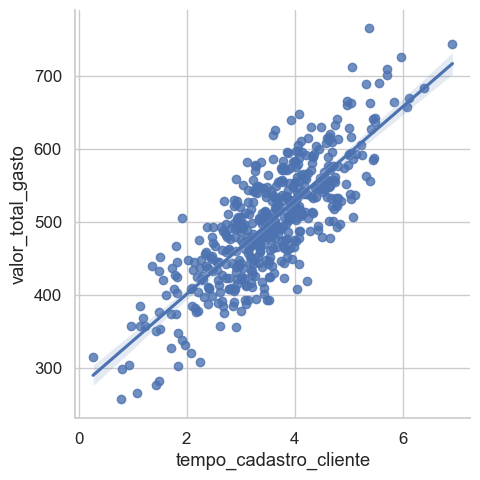

In [17]:
# lmplot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(y = "valor_total_gasto", x = "tempo_cadastro_cliente", data = dados)

In [18]:
# Correlação
dados[['tempo_cadastro_cliente', 'valor_total_gasto']].corr()

,tempo_cadastro_cliente,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.809084
valor_total_gasto,0.809084,1.000000


A partir do lmplot e do coeficiente de correlação, podemos ver que o tempo de cadastro e o valor total gasto têm uma forte correlação positiva, ou seja, quanto maior o tempo de cadastro do cliente, o valor total gasto por clientes também aumenta.

Outra coisa a se notar é que a sombra ao redor da linha é muito fina, o que significa que os erros entre a estimativa (linha) e os pontos de dados são relativamente pequenos.

### Análise 5 - Relação Entre Tempo Logado na App e Tempo Logado no Web Site

<Figure size 1800x1200 with 0 Axes>

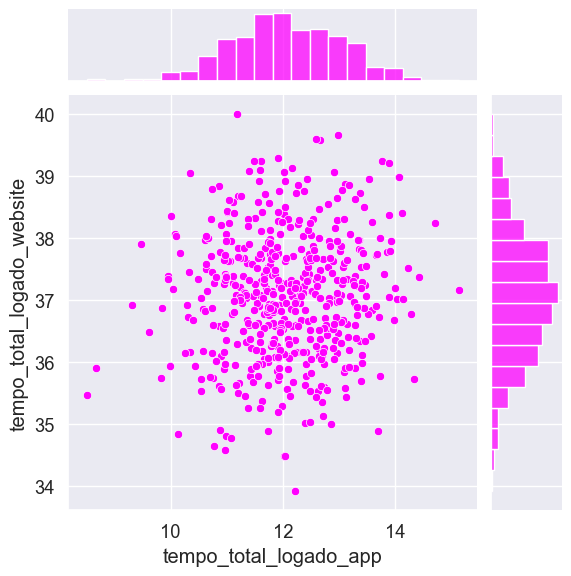

In [19]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados, x = 'tempo_total_logado_app', y = 'tempo_total_logado_website', color = 'magenta' )

#### Um ponto importante: 

Quando avaliamos a correlação entre duas variáveis preditoras, é esperado que ambas não sejam muito correlacionadas, pois isso pode enviesar o modelo de regressão, pois terão duas variáveis praticamente dizendo a "mesma coisa", impactando negativamente no aprendizado do modelo, que, de fato, busca um aprendizado generalizado.

Neste caso, não detectamos correlação entre as variáveis Tempo Logado na App e Tempo Logado no Web Site, sendo assim, podemos seguir com as variáveis em nosso modelo.

## Pré-Processamento de Dados Para Construção do modelo de machine learning

In [20]:
# Variáveis de entrada (variáveis preditoras)
X = dados[['tempo_cadastro_cliente', 
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app', 
           'tempo_total_logado_website']]

In [21]:
# Variável de saída (variável target)
y = dados['valor_total_gasto']

In [22]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

In [23]:
len(X_treino)

350

In [24]:
len(X_teste)

150

### Padronização dos dados

A padronização é um processo que faz com que os dados fiquem na mesma escala, e isso se faz necessário pois os algorítmos de machine learning assumem que os dados estão padronizados, caso os dados estejam em dimensões diferentes, o modelo ficará tendencioso aos dados de maior valor.

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_treino)

StandardScaler()

In [27]:
X_treino = scaler.transform(X_treino)

In [28]:
X_teste = scaler.transform(X_teste)

In [29]:
X_treino[:5]

array([[ 0.54493661,  1.63795701, -0.29666946, -0.21889818],
       [-0.47303124, -1.77809466,  0.1119277 , -1.61542675],
       [-0.60982665,  0.53289589,  1.23240324,  0.28751805],
       [-0.08803899, -0.50657657,  1.020864  , -0.38216196],
       [-0.12420167, -1.60173878,  0.82607544,  0.86715544]])

In [30]:
X_teste[:5]

array([[-0.40543391,  0.59940253,  0.24316526,  1.88699594],
       [ 1.24782465, -0.77170639, -1.11829699, -0.95944337],
       [ 1.26698494, -0.86419158, -0.63397066,  1.20496913],
       [-0.75625984, -0.40479455, -0.41816634,  0.29135381],
       [-0.38181772,  1.62024883, -0.41170003,  0.6774544 ]])

###  Estaremos avaliando 3 modelos diferentes de regressão e, posteriormente, avaliando qual deles apresentou um melhor resultado


#### Modelo 1: regressão linear simples

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [31]:
# Cria o modelo
modelo_v1 = LinearRegression()

In [32]:
# Treinamento
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [33]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [61.37409952 25.7967933  39.32692416  0.22550543]


In [34]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,61.374100
numero_medio_cliques_por_sessao,25.796793
tempo_total_logado_app,39.326924
tempo_total_logado_website,0.225505


Avaliação do modelo:

In [35]:
# Previsões com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

In [36]:
# Imprime as 10 primeiras previsões
pred_v1[:10]

array([499.74556057, 511.65859285, 529.98386804, 425.94090708,
       501.50294805, 474.45972846, 507.54098391, 389.45185631,
       447.16863748, 517.69547032])

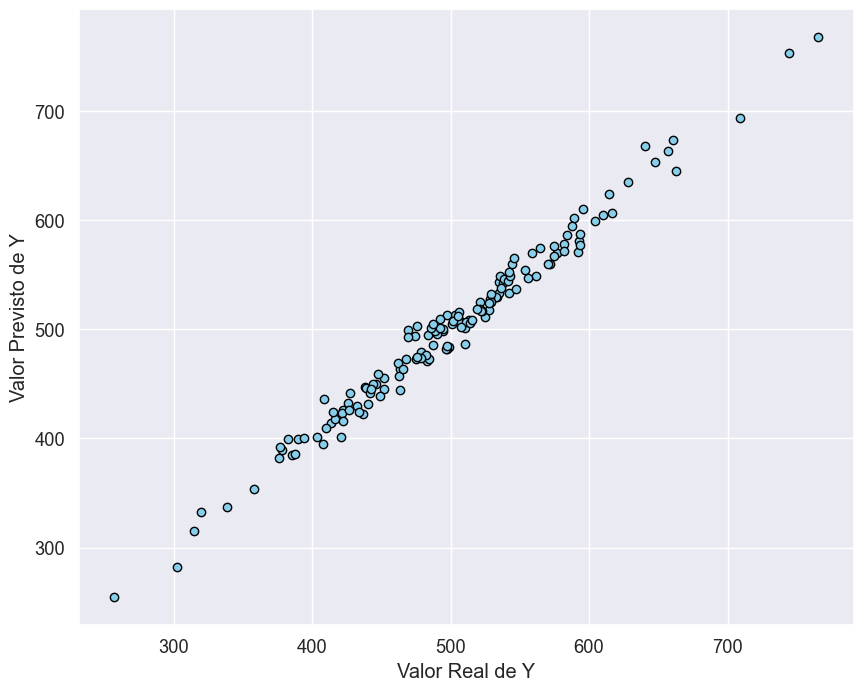

In [37]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

A partir do gráfico de dispersão, podemos ver que há uma correlação muito forte entre os y's previstos e os y's reais nos dados do teste. Isso significa que temos um modelo muito bom.

Métricas:

In [38]:
# Valor médio gasto pelos clientes
dados['valor_total_gasto'].mean()

499.31403826079975

In [39]:
# Valor mínimo
dados['valor_total_gasto'].min()

256.6705823

In [40]:
# Valor máximo
dados['valor_total_gasto'].max()

765.5184619

In [41]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v1)

8.407428427756379

> O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 7,76 reais, o que é um valor pequeno comparado ao valor médio gasto por cliente (R$ 499,31).

In [42]:
# MSE - Erro quadrático médio
mean_squared_error(y_teste, pred_v1)

111.7074855225431

In [43]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

10.569176198859735

O RMSE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 10.21, que é um valor pequeno comparado ao valor médio gasto por cliente.

In [44]:
# Coeficiente R2
r2_score(y_teste, pred_v1)

0.983138894837494

In [45]:
# Variância Explicada
explained_variance_score(y_teste, pred_v1)

0.9832532585931977

Podemos dizer que o modelo possui um ótimo poder de previsão, sendo capaz de explicar 98% da variância dos dados.

O coeficiente R2 de 98% e as outras métricas, demonstram que este é um modelo muito bom. Será que conseguimos melhorar essa performance?

### Resíduos

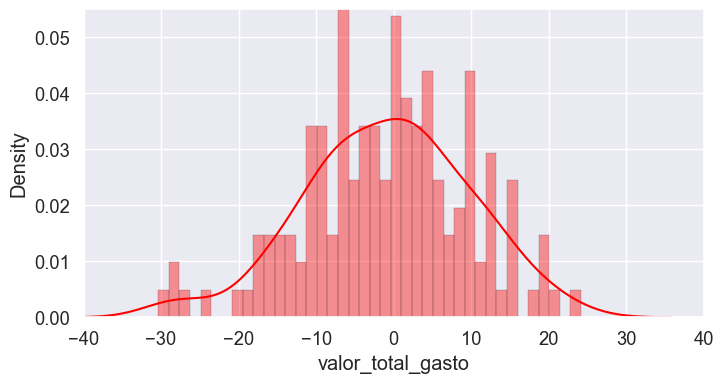

In [46]:
# Plot resíduos
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v1), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

Os resíduos são aproximadamente normalmente distribuídos, o que indica um bom ajuste do modelo. 

####  Modelo 2: regressão Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [47]:
# Cria o modelo
modelo_v2 = Ridge(alpha = 1.0)

In [48]:
# Treinamento
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [49]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [61.20349425 25.72634947 39.20986127  0.22434813]


In [50]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,61.203494
numero_medio_cliques_por_sessao,25.726349
tempo_total_logado_app,39.209861
tempo_total_logado_website,0.224348


In [51]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([499.74185606, 511.63209079, 529.90141062, 426.14705885,
       501.5013624 , 474.52378682, 507.5226679 , 389.76532166,
       447.32452603, 517.63930921])

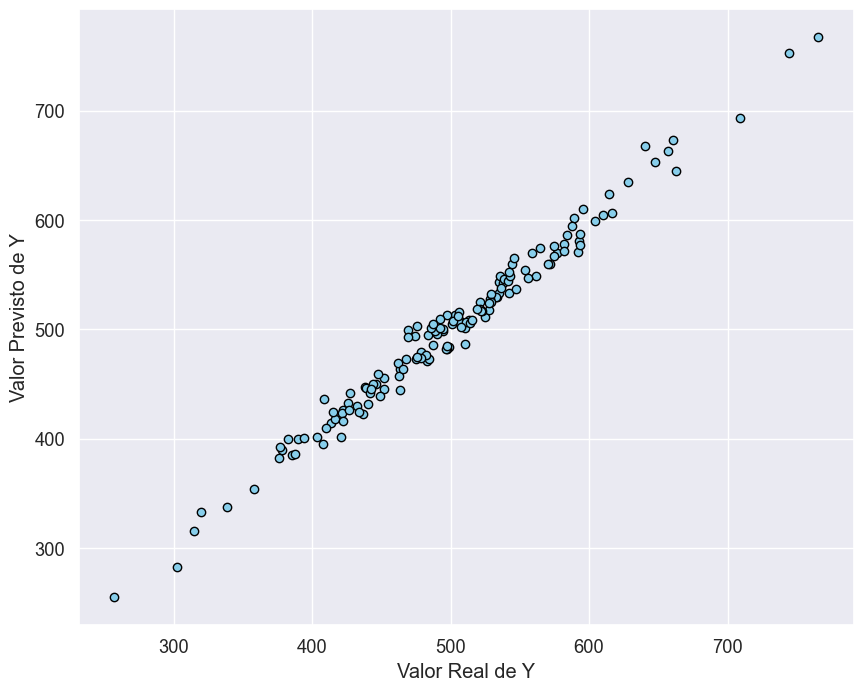

In [52]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [53]:
# MAE
mean_absolute_error(y_teste, pred_v2)

8.381880930094942

In [54]:
# MSE
mean_squared_error(y_teste, pred_v2)

111.42489313017128

In [55]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

10.55579902850425

In [56]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.9831815492757674

In [57]:
# Variância Explicada
explained_variance_score(y_teste, pred_v2)

0.9832947065955715

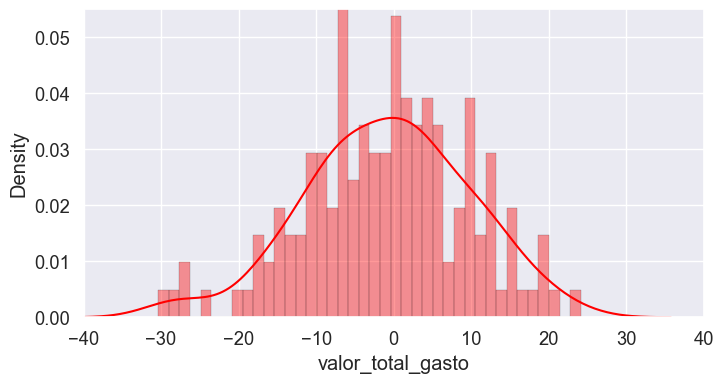

In [58]:
# Plot resíduos
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

####  Modelo 3: regressão LASSO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [59]:
# Cria o modelo
modelo_v3 = Lasso(alpha = 1.0)

In [60]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [61]:
print('Coeficientes: \n', modelo_v3.coef_)

Coeficientes: 
 [60.42655059 24.77812163 38.27659577  0.        ]


In [62]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,60.426551
numero_medio_cliques_por_sessao,24.778122
tempo_total_logado_app,38.276596
tempo_total_logado_website,0.000000


In [63]:
# Previsões com dados de teste
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:10]

array([498.83820344, 512.65327214, 530.0578156 , 427.44336313,
       500.49388802, 474.55881153, 507.30864628, 392.1797534 ,
       448.6207107 , 517.20955985])

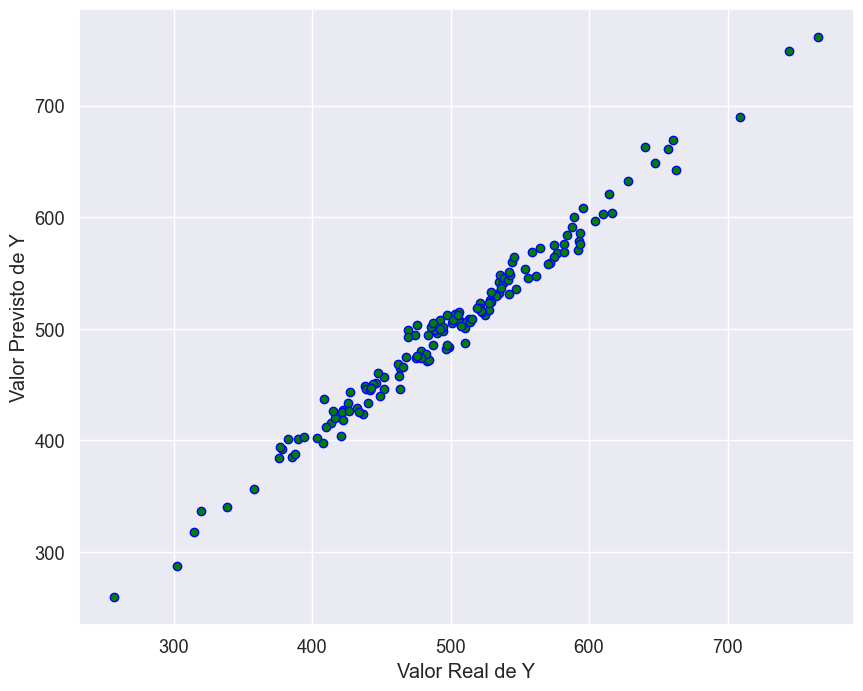

In [64]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v3, color = 'green', edgecolors = 'blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [65]:
# MAE
mean_absolute_error(y_teste, pred_v3)

8.487126965186002

In [66]:
# MSE
mean_squared_error(y_teste, pred_v3)

112.50676137066803

In [67]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v3))

10.606920447079258

In [68]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.9831815492757674

In [69]:
# Variância Explicada
explained_variance_score(y_teste, pred_v3)

0.9831134107153995

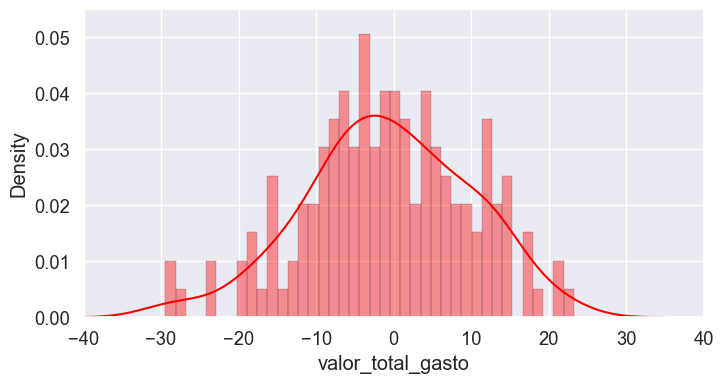

In [70]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v3), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## Seleção do Modelo

O modelo 3 apresentou uma taxa de erro (RMSE) levemente maior e pode ser descartado. Os modelos 1 e 2 ficaram muito próximos e nesse caso devemos escolher o modelo mais simples, que em nosso estudo é o modelo 1.

## Conclusão

In [72]:
# Coeficientes
df_coef_final = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef_final

,Coeficiente
tempo_cadastro_cliente,61.374100
numero_medio_cliques_por_sessao,25.796793
tempo_total_logado_app,39.326924
tempo_total_logado_website,0.225505


#### Interpretações dos Coeficientes:

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$ 63.74 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está associado a um aumento de R$ 26.24 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado na app está associado a um aumento de R$ 38.57 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado no web site está associado a um aumento de R$ 0.68 no valor total gasto por cliente por mês.

Podemos ver que será mais lucrativo para a empresa investir na atualização do seu app uma vez que o retorno será maior. Além disso, é importante criar políticas para reter o cliente por mais tempo, já que isso também leva ao aumento das vendas. A própria atualização do app será uma forma de reter o cliente por mais tempo.

Não compensa, neste momento, investir na atualização do web site pois o retorno será mínimo.